In [1]:
data(titanic_imputed, package = "DALEX")

model <- ranger::ranger(survived~., data = titanic_imputed, classification = TRUE, probability = TRUE)

In [9]:
library(DALEX)
library(DALEXtra)
explainer <- DALEX::explain(model = model,
                     data = titanic_imputed[,-8],
                     y = titanic_imputed$survived)

Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.12.1 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.010875 , mean =  0.3220075 , max =  0.9927106  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7842182 , mean =  0.0001492315 , max =  0.8826551  
  A new explainer has been created!  


In [10]:
aspects_titanic <-
  list(
    wealth = c("class", "fare"),
    family = c("sibsp", "parch"),
    personal = c("age", "gender"),
    embarked = "embarked"
  )

In [11]:
library("triplot")

ai_titanic <- predict_aspects(x = explainer, 
                              new_observation = titanic_imputed[11,-8],
                              variable_groups = aspects_titanic)

In [14]:
titanic_imputed[11,-8]

,gender,age,class,embarked,fare,sibsp,parch
11,male,30,3rd,Southampton,7.05,0,0


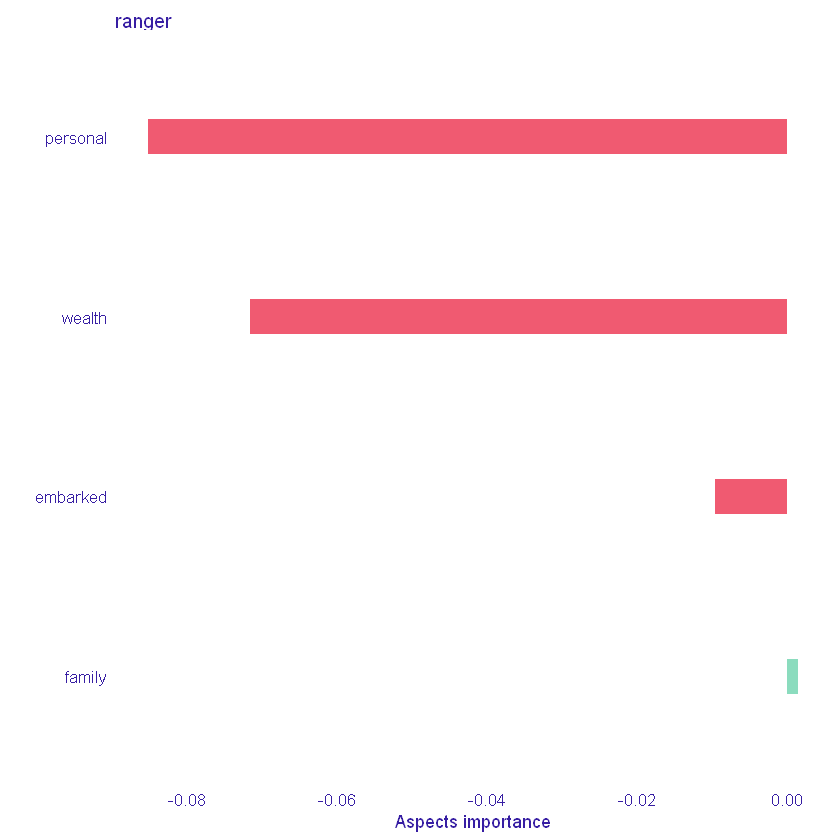

In [13]:
plot(ai_titanic)

In [17]:
apartments_num <- apartments[,unlist(lapply(apartments, is.numeric))]

model_apartments <- lm(m2.price ~ ., data = apartments_num)

In [18]:
explainer_apartments <- DALEX::explain(model = model_apartments, 
                              data = apartments_num[, -1],
                              y = apartments_num$m2.price,
                              verbose = FALSE)

In [26]:
tri_apartments <- model_triplot(explain_apartments)

plot(tri_apartments)

ERROR: Error in expansion(add = expansion_parameter): nie udało się znaleźć funkcji 'expansion'
